# Ejercicio de programación Regresión Lineal Multiple

# Ejercicio de programación Regresión Lineal Multiple

In [27]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

import pandas as pd

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline



## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [28]:
# Cargar datos



'''
ESTUDIANTE: Victoria Avila Carlos Osmar
CARRERA: Ingeniería en Ciencias de la Computación
CU: 111-333


INFORMACIÓN SOBRE EL CONJUNTO DE DATOS:
El conjunto de datos contiene características y expectativas de vida de 193 países de 2000 a 2015.
Columnas X
x1 = Año
x2 = Mortalidad infantil
x3 = Mortalidad de menores de cinco años
x4 = Mortalidad adulta
x5 = Muerte por consumo de Alcohol
x6 = Hepatitis B
x7 = Sarampión
x8 = IMC
x9 = Polio
x10 = Difteria
x11 = VIH / SIDA

Columna Y
Y = Esperanza de vida

'''
# Total de tados en el dataset 2.864 rows.
# 2.577 rows para entrenamiento (90%)
# 287 rows para test (10%) (el test se realiza al final del notebook)

#lee el los valores del archivo csv
df = pd.read_csv('Cars2023.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.95))
X = data[:train_rows, :6]
y = data[:train_rows, 6]
m = y.size

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'y'))
print('-'*27)
for i in range(10):
    print('{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], y[i]))


  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5]         y
---------------------------
     260     400     209     980       4     189       668
     250     405     210    1000       4     146        50
     135     315     165     230       5      36       840
     250     415     181     640       5      63       667
     220     425     197    1050       4      98       514
     140     310     168     230       5      37       840
     260     415     202    1020       4     156       348
     145     170     168     180       4      39       900
     250     395     180     970       4     108       867
     250     460     182    1130       4     114       389


# New Section

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar. 

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (tamaño de las casas) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de los tamaños de las casas.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $. 

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir los precios de casas que no se han visto antes. Dado un nuevo valor de x (area del living room y el numero de dormitorios), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [29]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [30]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 260.  400.  209.  980.    4.  189.]
 [ 250.  405.  210. 1000.    4.  146.]
 [ 135.  315.  165.  230.    5.   36.]
 ...
 [ 200.  425.  206.  550.    5.   72.]
 [ 200.  400.  230.  540.    7.   82.]
 [ 200.  520.  237.  520.    7.   89.]]
Media calculada: [180.81304348 358.5        202.78695652 539.47826087   5.3826087
  68.64347826]
Desviación estandar calculada: [ 39.27168251 107.40632926  33.66862563 250.8328509    1.00505339
  33.08676113]
[[ 2.01638818e+00  3.86383189e-01  1.84535108e-01  1.75623622e+00
  -1.37565696e+00  3.63760361e+00]
 [ 1.76175178e+00  4.32935380e-01  2.14236350e-01  1.83597060e+00
  -1.37565696e+00  2.33799015e+00]
 [-1.16656686e+00 -4.05004065e-01 -1.12231954e+00 -1.23380275e+00
  -3.80684945e-01 -9.86602410e-01]
 ...
 [ 4.88569761e-01  6.19144146e-01  9.54313821e-02  4.19472134e-02
  -3.80684945e-01  1.01446066e-01]
 [ 4.88569761e-01  3.86383189e-01  8.08261192e-01  2.08002711e-03
   1.60925908e+00  4.03681753e-01]
 [ 4.88569761e-01  1.50363578e+00  1.0161

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [31]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [32]:
print(X)

[[ 1.00000000e+00  2.01638818e+00  3.86383189e-01 ...  1.75623622e+00
  -1.37565696e+00  3.63760361e+00]
 [ 1.00000000e+00  1.76175178e+00  4.32935380e-01 ...  1.83597060e+00
  -1.37565696e+00  2.33799015e+00]
 [ 1.00000000e+00 -1.16656686e+00 -4.05004065e-01 ... -1.23380275e+00
  -3.80684945e-01 -9.86602410e-01]
 ...
 [ 1.00000000e+00  4.88569761e-01  6.19144146e-01 ...  4.19472134e-02
  -3.80684945e-01  1.01446066e-01]
 [ 1.00000000e+00  4.88569761e-01  3.86383189e-01 ...  2.08002711e-03
   1.60925908e+00  4.03681753e-01]
 [ 1.00000000e+00  4.88569761e-01  1.50363578e+00 ... -7.76543455e-02
   1.60925908e+00  6.15246735e-01]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`. 
</div>

<a id="computeCostMulti"></a>

In [33]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [34]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [592.02608696  55.26457182 -19.6653422  -57.1175072  -67.33399197
  39.98627161 -27.79503142]
Costo final del descenso por el gradiente: 42050.150


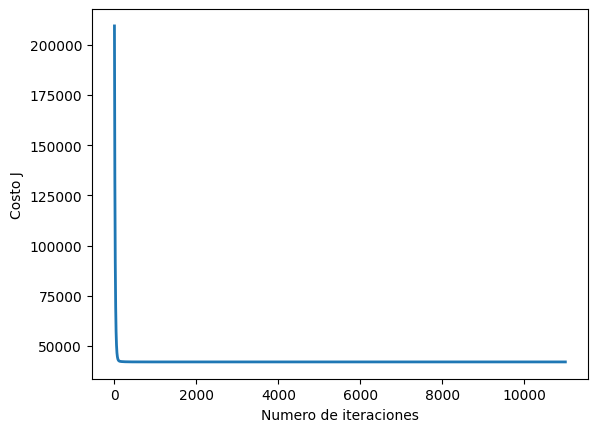

In [35]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 # alpha = 0.003
num_iters = 11000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print('Costo final del descenso por el gradiente: {:0.3f}'.format(J_history[-1]))   



# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [36]:
# Pueba con el 10% que queda de elementos para la esperanza de vida como Y 

#lee el los valores del archivo csv
df = pd.read_csv('Cars2023.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
test_rows= int(round(amount_rows * 0.05))
X = data[test_rows:, :6]
Life_Expectancy_data= data[test_rows:, 6]

X_norm, mu, sigma = featureNormalize(X)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
Life_Expectancy = np.dot(X_final, theta)  



In [37]:
# impresion de los datos predecidos y los reales
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", Life_Expectancy[i], "- Valor real:", Life_Expectancy_data[i])


Ejemplo 1 - Predicción: 572.408819729039 - Valor real: 200.0
Ejemplo 2 - Predicción: 652.9881818334576 - Valor real: 990.0
Ejemplo 3 - Predicción: 585.2817097665994 - Valor real: 900.0
Ejemplo 4 - Predicción: 580.0703625381705 - Valor real: 300.0
Ejemplo 5 - Predicción: 657.0402778329852 - Valor real: 990.0
Ejemplo 6 - Predicción: 609.0462280192195 - Valor real: 490.0
Ejemplo 7 - Predicción: 547.3744377751585 - Valor real: 990.0
Ejemplo 8 - Predicción: 600.1110334596239 - Valor real: 990.0
Ejemplo 9 - Predicción: 591.1505557157961 - Valor real: 490.0
Ejemplo 10 - Predicción: 583.2124005700415 - Valor real: 335.0
Ejemplo 11 - Predicción: 537.7123489748792 - Valor real: 519.0
Ejemplo 12 - Predicción: 527.0129042365386 - Valor real: 500.0


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [38]:
# Total de tados en el dataset 2.864 rows.
# 2.577 rows para entrenamiento (90%)
# 287 rows para test (10%) (el test se realiza al final del notebook)

#lee el los valores del archivo csv
df = pd.read_csv('Cars2023.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.95))
X = data[:train_rows, :6]
y = data[:train_rows, 6]
m = y.size

X, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [39]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [40]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios


Theta calculado a partir de la ecuación de la normal: [592.02608696  55.26457182 -19.6653422  -57.1175072  -67.33399197
  39.98627161 -27.79503142]


In [41]:
#lee el los valores del archivo csv
df = pd.read_csv('Cars2023.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
test_rows= int(round(amount_rows * 0.05))
X = data[test_rows:, :6]
Life_Expectancy_data= data[test_rows:, 6]


X_norm, mu, sigma = featureNormalize(X)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
Life_Expectancy = np.dot(X_final, theta)  

In [42]:
# impresion de los datos predecidos y los reales
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", Life_Expectancy[i], "- Valor real:", Life_Expectancy_data[i])

Ejemplo 1 - Predicción: 572.4088197290401 - Valor real: 200.0
Ejemplo 2 - Predicción: 652.9881818334592 - Valor real: 990.0
Ejemplo 3 - Predicción: 585.2817097666012 - Valor real: 900.0
Ejemplo 4 - Predicción: 580.0703625381724 - Valor real: 300.0
Ejemplo 5 - Predicción: 657.0402778329866 - Valor real: 990.0
Ejemplo 6 - Predicción: 609.0462280192216 - Valor real: 490.0
Ejemplo 7 - Predicción: 547.3744377751608 - Valor real: 990.0
Ejemplo 8 - Predicción: 600.111033459627 - Valor real: 990.0
Ejemplo 9 - Predicción: 591.1505557157991 - Valor real: 490.0
Ejemplo 10 - Predicción: 583.2124005700434 - Valor real: 335.0
Ejemplo 11 - Predicción: 537.7123489748825 - Valor real: 519.0
Ejemplo 12 - Predicción: 527.0129042365398 - Valor real: 500.0
